<a href="https://colab.research.google.com/github/NatShed/Classif-16-09/blob/main/Clastering_%D0%A9%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Содержание датасета:

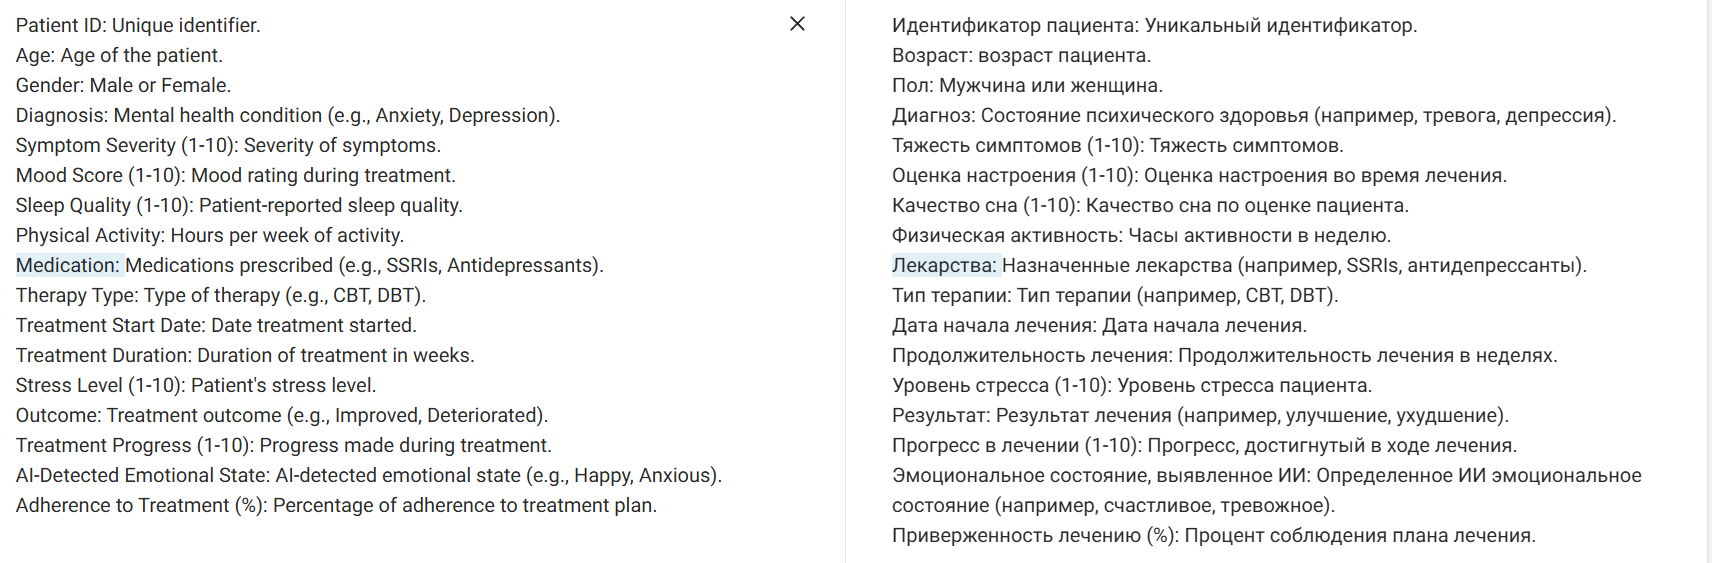

https://www.kaggle.com/datasets/uom190346a/mental-health-diagnosis-and-treatment-monitoring

In [ ]:
dataset = pd.read_csv("mental_health_diagnosis_treatment_.csv")

In [ ]:
dataset.head()


,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43,Female,Major Depressive Disorder,10,5,8,5,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,9,Deteriorated,7,Anxious,66
1,2,40,Female,Major Depressive Disorder,9,5,4,7,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7,No Change,7,Neutral,78
2,3,55,Female,Major Depressive Disorder,6,3,4,3,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,7,Deteriorated,5,Happy,62
3,4,34,Female,Major Depressive Disorder,6,3,6,5,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8,Deteriorated,10,Excited,72
4,5,52,Male,Panic Disorder,7,6,6,8,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5,Deteriorated,6,Excited,63


In [ ]:
data = dataset #чтобы не потерять изначальный вид таблицы

In [ ]:
data = data.drop(columns=['Patient ID', 'Treatment Start Date'], errors='ignore')
#Удаление ненужных столбцов

In [ ]:
# Дополнительная информация о датафрейме
print(f'{data.info()}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           500 non-null    int64 
 1   Gender                        500 non-null    object
 2   Diagnosis                     500 non-null    object
 3   Symptom Severity (1-10)       500 non-null    int64 
 4   Mood Score (1-10)             500 non-null    int64 
 5   Sleep Quality (1-10)          500 non-null    int64 
 6   Physical Activity (hrs/week)  500 non-null    int64 
 7   Medication                    500 non-null    object
 8   Therapy Type                  500 non-null    object
 9   Treatment Duration (weeks)    500 non-null    int64 
 10  Stress Level (1-10)           500 non-null    int64 
 11  Outcome                       500 non-null    object
 12  Treatment Progress (1-10)     500 non-null    int64 
 13  AI-Detected Emotiona

In [ ]:
dataset["Diagnosis"].unique()

array(['Major Depressive Disorder', 'Panic Disorder',
       'Generalized Anxiety', 'Bipolar Disorder'], dtype=object)

In [ ]:
dataset["Medication"].unique()

array(['Mood Stabilizers', 'Antipsychotics', 'SSRIs', 'Anxiolytics',
       'Antidepressants', 'Benzodiazepines'], dtype=object)

In [ ]:
dataset["Therapy Type"].unique()

array(['Interpersonal Therapy', 'Mindfulness-Based Therapy',
       'Cognitive Behavioral Therapy', 'Dialectical Behavioral Therapy'],
      dtype=object)

In [ ]:
dataset["Outcome"].unique()

array(['Deteriorated', 'No Change', 'Improved'], dtype=object)

In [ ]:
dataset["AI-Detected Emotional State"].unique()

array(['Anxious', 'Neutral', 'Happy', 'Excited', 'Stressed', 'Depressed'],
      dtype=object)

In [ ]:
dataset["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# заменя категориальных на количественные
data["Gender"] = data["Gender"].replace(data["Gender"].unique(), [0, 1])
data["Diagnosis"] = data["Diagnosis"].replace(data["Diagnosis"].unique(), [0, 1, 2, 3])
data["Medication"] = data["Medication"].replace(data["Medication"].unique(), [0, 1, 2, 3, 4, 5])
data["Therapy Type"] = data["Therapy Type"].replace(data["Therapy Type"].unique(), [0, 1, 2, 3])
data["Outcome"] = data["Outcome"].replace(data["Outcome"].unique(), [0, 1, 2])
data["AI-Detected Emotional State"] = data["AI-Detected Emotional State"].replace(data["AI-Detected Emotional State"].unique(), [0, 1, 2, 3, 4, 5])

<ipython-input-68-69862d2e1a80>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"] = data["Gender"].replace(data["Gender"].unique(), [0, 1])
<ipython-input-68-69862d2e1a80>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Diagnosis"] = data["Diagnosis"].replace(data["Diagnosis"].unique(), [0, 1, 2, 3])
<ipython-input-68-69862d2e1a80>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=Fal

In [ ]:
data.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43,0,0,10,5,8,5,0,0,11,9,0,7,0,66
1,40,0,0,9,5,4,7,1,0,11,7,1,7,1,78
2,55,0,0,6,3,4,3,2,1,14,7,0,5,2,62
3,34,0,0,6,3,6,5,2,1,8,8,0,10,3,72
4,52,1,1,7,6,6,8,3,0,12,5,0,6,3,63


In [ ]:
# Дополнительная информация о датафрейме
print(f'{data.info()}\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           500 non-null    int64
 1   Gender                        500 non-null    int64
 2   Diagnosis                     500 non-null    int64
 3   Symptom Severity (1-10)       500 non-null    int64
 4   Mood Score (1-10)             500 non-null    int64
 5   Sleep Quality (1-10)          500 non-null    int64
 6   Physical Activity (hrs/week)  500 non-null    int64
 7   Medication                    500 non-null    int64
 8   Therapy Type                  500 non-null    int64
 9   Treatment Duration (weeks)    500 non-null    int64
 10  Stress Level (1-10)           500 non-null    int64
 11  Outcome                       500 non-null    int64
 12  Treatment Progress (1-10)     500 non-null    int64
 13  AI-Detected Emotional State   500 n

In [ ]:
data.columns.tolist()

['Age',
 'Gender',
 'Diagnosis',
 'Symptom Severity (1-10)',
 'Mood Score (1-10)',
 'Sleep Quality (1-10)',
 'Physical Activity (hrs/week)',
 'Medication',
 'Therapy Type',
 'Treatment Duration (weeks)',
 'Stress Level (1-10)',
 'Outcome',
 'Treatment Progress (1-10)',
 'AI-Detected Emotional State',
 'Adherence to Treatment (%)']

Выберем в качестве целевой переменной столбец 'Outcome' - результат лечения: 0 - уходшение, 1 - без изменений, 2 - улучшение



In [ ]:
# сохраняем только числовые столбцы. Категориальные кодируем в числовые. Целевую переменную (если она есть) - убираем
cols_for_clusters = ['Age',
 'Gender',
 'Diagnosis',
 'Symptom Severity (1-10)',
 'Mood Score (1-10)',
 'Sleep Quality (1-10)',
 'Physical Activity (hrs/week)',
 'Medication',
 'Therapy Type',
 'Treatment Duration (weeks)',
 'Stress Level (1-10)',
 'Treatment Progress (1-10)',
 'AI-Detected Emotional State',
 'Adherence to Treatment (%)']

df= data[cols_for_clusters].copy() # делаем копию, чтобы не было сюрпризов с исходным набором данных

In [ ]:
df.head()

,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Duration (weeks),Stress Level (1-10),Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,43,0,0,10,5,8,5,0,0,11,9,7,0,66
1,40,0,0,9,5,4,7,1,0,11,7,7,1,78
2,55,0,0,6,3,4,3,2,1,14,7,5,2,62
3,34,0,0,6,3,6,5,2,1,8,8,10,3,72
4,52,1,1,7,6,6,8,3,0,12,5,6,3,63


In [ ]:
X = df
y = data['Outcome']

### Распространенные алгоритмы кластеризации



In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

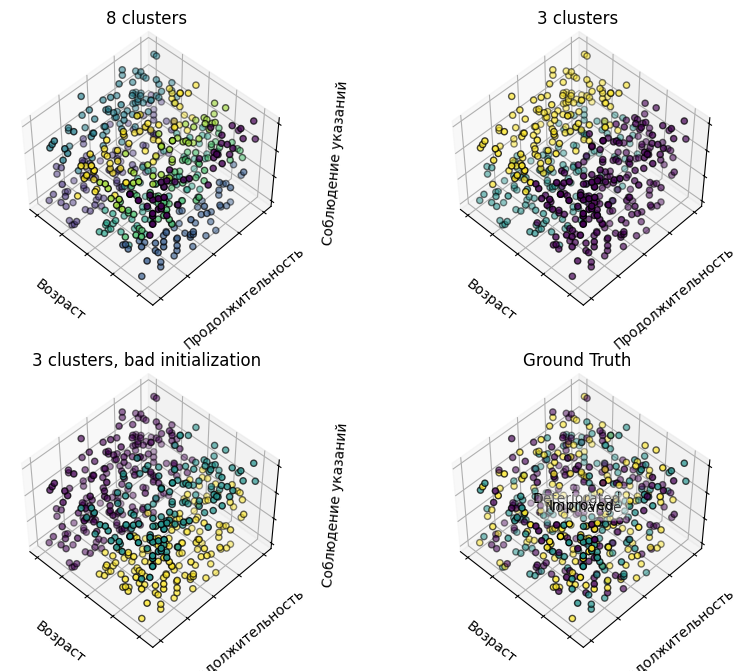

In [ ]:
estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8)),
    ("k_means_iris_3", KMeans(n_clusters=3)),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]
#Обучаем несколько моделей кластеризации с разным входными параметрами и отрисовываем 3D графики
#Для отрисовки выбраны оси Качество сна, Продолжительность лечения, Приверженность лечению (%)
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Age"], X["Treatment Duration (weeks)"], X["Adherence to Treatment (%)"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Возраст")
    ax.set_ylabel("Продолжительность")
    ax.set_zlabel("Соблюдение указаний")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [('Deteriorated', 0), ('No Change', 1), ('Improved', 2)]:
    ds = data[data["Outcome"]==label]
    ax.text3D(
        ds["Age"].mean(),
        ds["Treatment Duration (weeks)"].mean(),
        ds["Adherence to Treatment (%)"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["Age"], X["Treatment Duration (weeks)"], X["Adherence to Treatment (%)"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Возраст")
ax.set_ylabel("Продолжительность")
ax.set_zlabel("Соблюдение указаний")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [ ]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:
#Перебираем значения количества кластеров и определяем наилучшие метрики
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


print("Лучшее количество кластеров :",  best_metric[0])
print("Silhouette score :",best_metric[1])
print("Adjusted rand score :", best_metric[2])
print("Центры кластеров :\n", best_metric[3])

Лучшее количество кластеров : 2
Silhouette score : 0.36492148254486334
Adjusted rand score : 0.0052530928835438665
Центры кластеров :
 [[28.04230769  0.55769231  1.51538462  7.56923077  5.44230769  6.41538462
   5.17307692  2.43076923  1.46153846 12.30769231  7.53846154  7.40769231
   2.47692308 75.31923077]
 [50.2625      0.50416667  1.51666667  7.37916667  5.525       6.53333333
   5.2625      2.5         1.54583333 11.89583333  7.54583333  7.46666667
   2.14583333 75.6       ]]


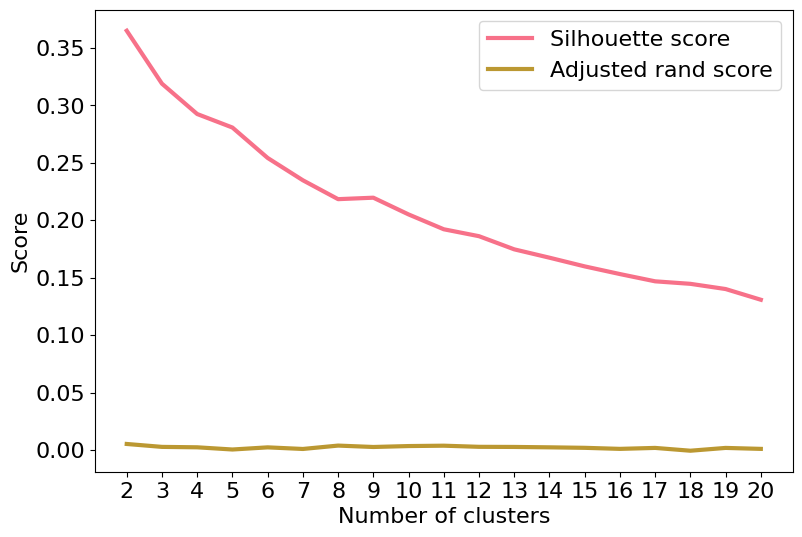

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()
#Отрисовываем график зависимости метрик от количества кластеров

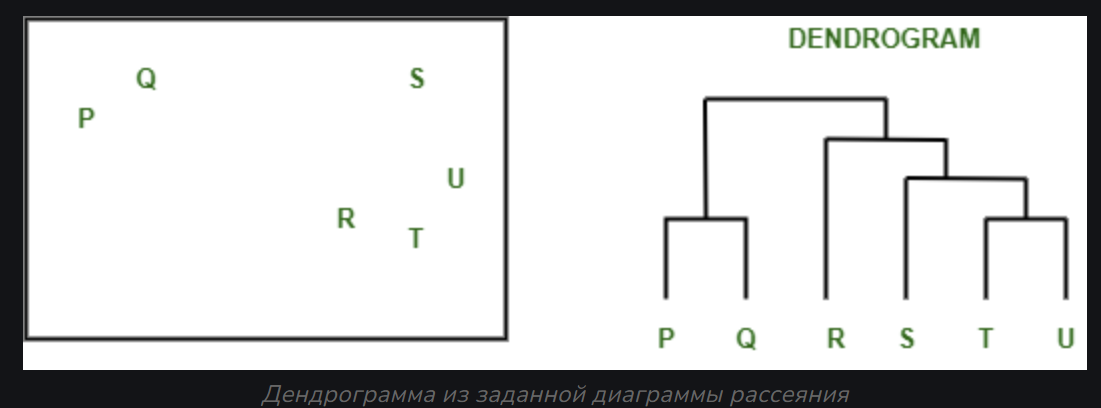

Ветви дендрограммы называются кладами. Эти клады организованы в соответствии с тем, насколько они похожи или различны.
Каждая клада дендрограммы имеет один или несколько листьев. P, Q, R, S, T и U являются листьями дендрограммы:
Тройной (трехлистный): P, Q, R
Двойной (двулистный): S, T
Одинарный (simplicifolius): U

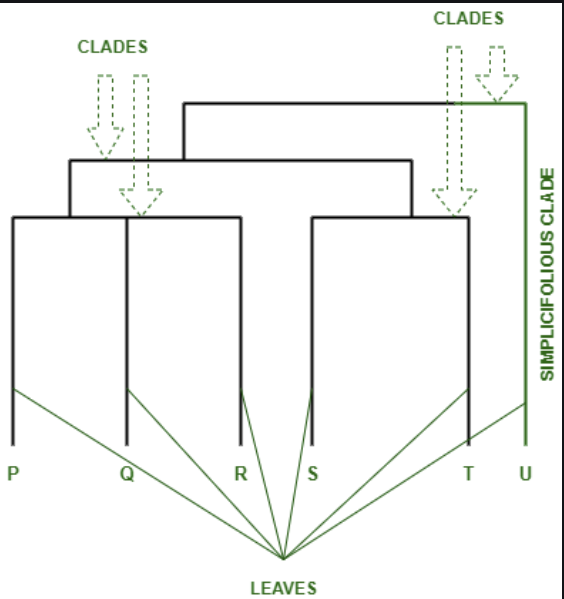

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

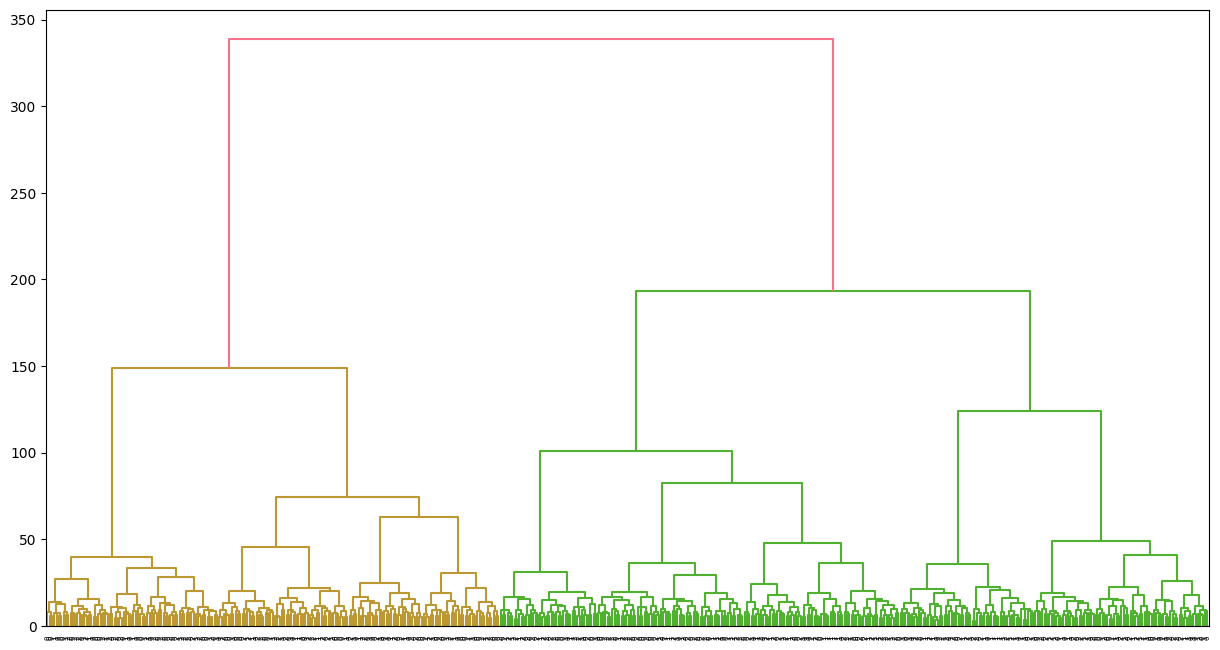

In [ ]:
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [ ]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


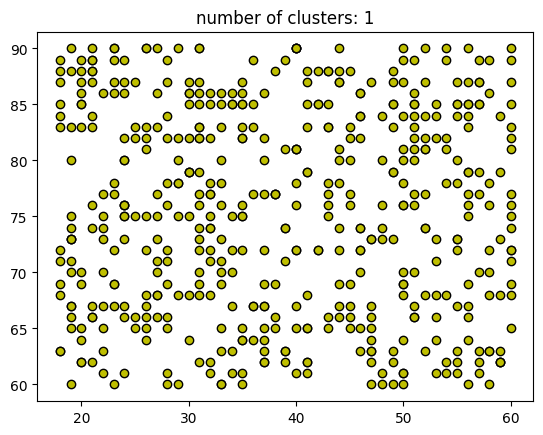

In [170]:
db = DBSCAN(eps=1000000, min_samples=4).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["Age"], xy["Adherence to Treatment (%)"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["Age"], xy["Adherence to Treatment (%)"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


Черные точки - это выбросы. Меняя значение eps и min_samples, мы можем контролировать результат работы алгоритма

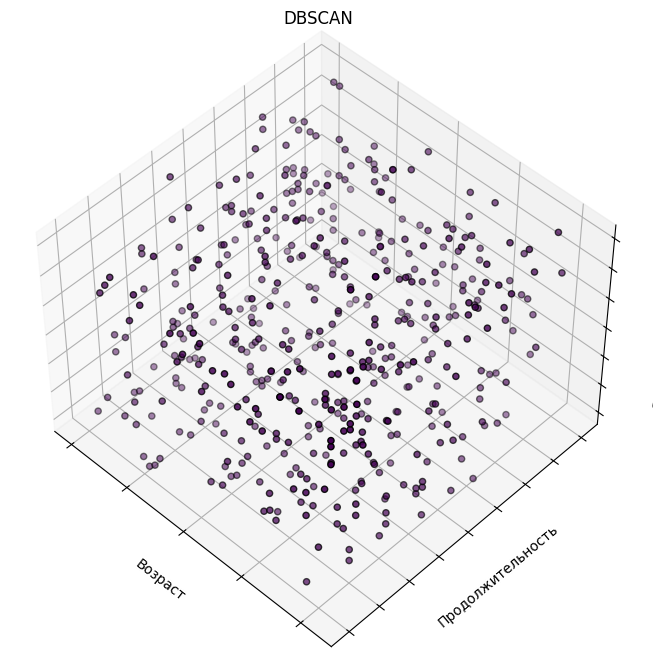

In [168]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Age"], X["Treatment Duration (weeks)"], X["Adherence to Treatment (%)"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Возраст")
ax.set_ylabel("Продолжительность")
ax.set_zlabel("Соблюдение указаний")
ax.set_title("DBSCAN")

plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [172]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

InvalidParameterError: The 'labels' parameter of silhouette_score must be an array-like. Got 3 instead.

Все плохо. Это случилось, потому что у меня больше одного кластера не получилсось....
Видимо, выбранный датасет не подходит для кластеризации
Пробовала по-разному менять параметры дбскана - ничего, при точности 1000 получился один кластер и все